Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [27]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

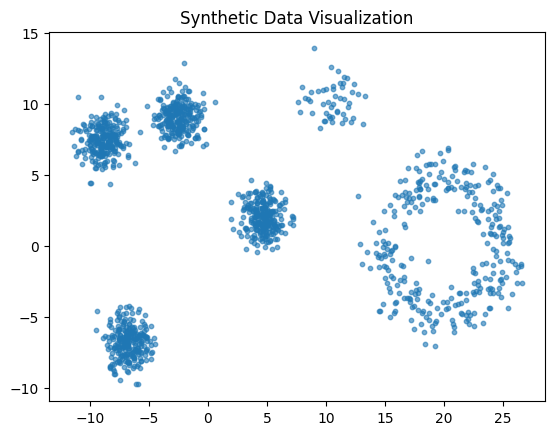

In [28]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.6)
plt.title("Synthetic Data Visualization")
plt.show()

3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [29]:
# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from IPython.display import display

# Run experiments with different k values
k_values = [3, 4, 5, 6, 7]
experiments_kmeans = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    experiments_kmeans.append({"Algorithm": "K-Means", "Params": f"k={k}", "Silhouette Score": score})

# Store results in a DataFrame
df_kmeans = pd.DataFrame(experiments_kmeans)
display(df_kmeans)


,Algorithm,Params,Silhouette Score
0,K-Means,k=3,0.585790
1,K-Means,k=4,0.681319
2,K-Means,k=5,0.697614
3,K-Means,k=6,0.725118
4,K-Means,k=7,0.702604


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [30]:
# Import required libraries
from sklearn.cluster import AgglomerativeClustering

# Run experiments with different k values
experiments_agglo = []

for k in k_values:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels)
    experiments_agglo.append({"Algorithm": "Agglomerative", "Params": f"k={k}", "Silhouette Score": score})

# Store results in a DataFrame
df_agglo = pd.DataFrame(experiments_agglo)
display(df_agglo)


,Algorithm,Params,Silhouette Score
0,Agglomerative,k=3,0.580623
1,Agglomerative,k=4,0.681264
2,Agglomerative,k=5,0.697786
3,Agglomerative,k=6,0.725690
4,Agglomerative,k=7,0.701496


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [31]:
# Import required libraries
from sklearn.cluster import DBSCAN

# Run experiments with different eps and min_samples values
eps_values = [0.5, 1.0, 1.5, 2.0, 2.5]
min_samples_values = [3, 4, 5, 6, 7]
experiments_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # Ensure there is more than one cluster
            score = silhouette_score(X, labels)
            experiments_dbscan.append({"Algorithm": "DBSCAN", "Params": f"eps={eps}, min_samples={min_samples}", "Silhouette Score": score})

# Store results in a DataFrame
df_dbscan = pd.DataFrame(experiments_dbscan)
display(df_dbscan)


,Algorithm,Params,Silhouette Score
0,DBSCAN,"eps=0.5, min_samples=3",0.348823
1,DBSCAN,"eps=0.5, min_samples=4",0.335512
2,DBSCAN,"eps=0.5, min_samples=5",0.288652
3,DBSCAN,"eps=0.5, min_samples=6",0.297382
4,DBSCAN,"eps=0.5, min_samples=7",0.335837
5,DBSCAN,"eps=1.0, min_samples=3",0.713499
6,DBSCAN,"eps=1.0, min_samples=4",0.712638
7,DBSCAN,"eps=1.0, min_samples=5",0.707012
8,DBSCAN,"eps=1.0, min_samples=6",0.703868
9,DBSCAN,"eps=1.0, min_samples=7",0.680739


6. Compare the results and choose the best method for the data



Best Experiment for Each Algorithm:
K-Means: k=6 with Silhouette Score 0.7251181630059241
Agglomerative: k=6 with Silhouette Score 0.7256900714288006
DBSCAN: eps=1.0, min_samples=3 with Silhouette Score 0.713499236081091

Best Overall Clustering Algorithm 
Algorithm: Agglomerative
Best Parameters: k=6
Silhouette Score: 0.7256900714288006


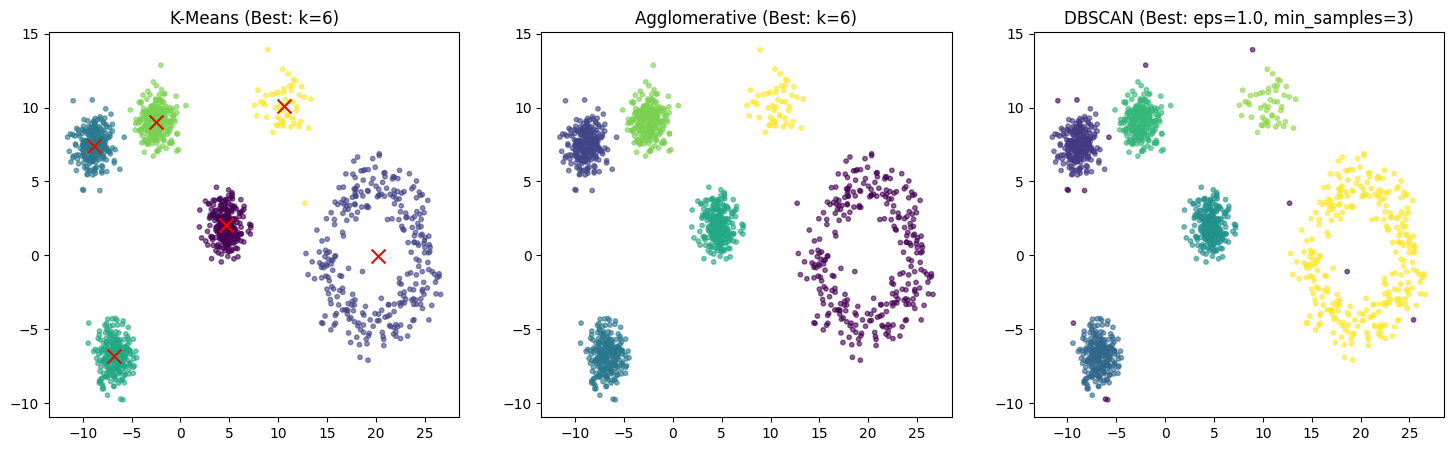

,Algorithm,Params,Silhouette Score
0,K-Means,k=3,0.585790
1,K-Means,k=4,0.681319
2,K-Means,k=5,0.697614
3,K-Means,k=6,0.725118
4,K-Means,k=7,0.702604
5,Agglomerative,k=3,0.580623
6,Agglomerative,k=4,0.681264
7,Agglomerative,k=5,0.697786
8,Agglomerative,k=6,0.725690
9,Agglomerative,k=7,0.701496


In [36]:
# Combine all results
df_all = pd.concat([df_kmeans, df_agglo, df_dbscan], ignore_index=True)

# Get the best result for each algorithm
best_kmeans = df_kmeans.loc[df_kmeans["Silhouette Score"].idxmax()]
best_agglo = df_agglo.loc[df_agglo["Silhouette Score"].idxmax()]
best_dbscan = df_dbscan.loc[df_dbscan["Silhouette Score"].idxmax()]

# Find the overall best algorithm based on the highest Silhouette Score
best_overall = df_all.loc[df_all["Silhouette Score"].idxmax()]

# Display best results for each algorithm
print("\nBest Experiment for Each Algorithm:")
print(f"K-Means: {best_kmeans['Params']} with Silhouette Score {best_kmeans['Silhouette Score']}")
print(f"Agglomerative: {best_agglo['Params']} with Silhouette Score {best_agglo['Silhouette Score']}")
print(f"DBSCAN: {best_dbscan['Params']} with Silhouette Score {best_dbscan['Silhouette Score']}")

# Print the winner
print("\nBest Overall Clustering Algorithm ")
print(f"Algorithm: {best_overall['Algorithm']}")
print(f"Best Parameters: {best_overall['Params']}")
print(f"Silhouette Score: {best_overall['Silhouette Score']}")

kmeans_best = KMeans(n_clusters=int(best_kmeans['Params'].split('=')[1]), random_state=42, n_init=10)
kmeans_labels = kmeans_best.fit_predict(X)

agglo_best = AgglomerativeClustering(n_clusters=int(best_agglo['Params'].split('=')[1]), linkage='ward')
agglo_labels = agglo_best.fit_predict(X)

dbscan_params = best_dbscan['Params'].split(", ")
eps_value = float(dbscan_params[0].split('=')[1])
min_samples_value = int(dbscan_params[1].split('=')[1])
dbscan_best = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan_best.fit_predict(X)

# Set up the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# K-Means Plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10, alpha=0.6)
axes[0].scatter(kmeans_best.cluster_centers_[:, 0], kmeans_best.cluster_centers_[:, 1], c='red', marker='x', s=100)
axes[0].set_title(f"K-Means (Best: {best_kmeans['Params']})")

# Agglomerative Clustering Plot
axes[1].scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='viridis', s=10, alpha=0.6)
axes[1].set_title(f"Agglomerative (Best: {best_agglo['Params']})")

# DBSCAN Plot
axes[2].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10, alpha=0.6)
axes[2].set_title(f"DBSCAN (Best: {best_dbscan['Params']})")

# Show the plots
plt.show()

# Display the full comparison table
display(df_all)

